In [1]:
#SIMPLE LINEAR REGRESSION 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


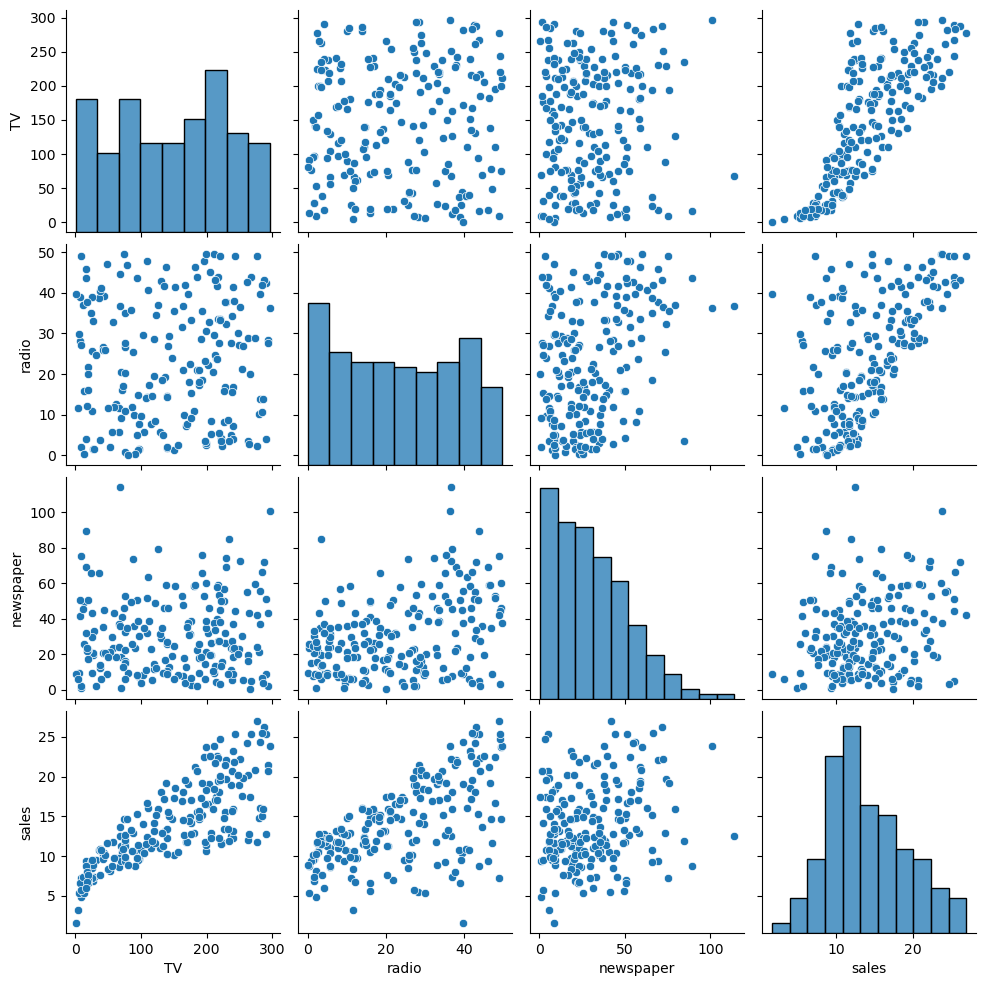

In [6]:
sns.pairplot(df)

In [7]:
#from plots we see the sales is less dependent of newspaper and a lot dependent on tv
#we can check the correlation using heatmap

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

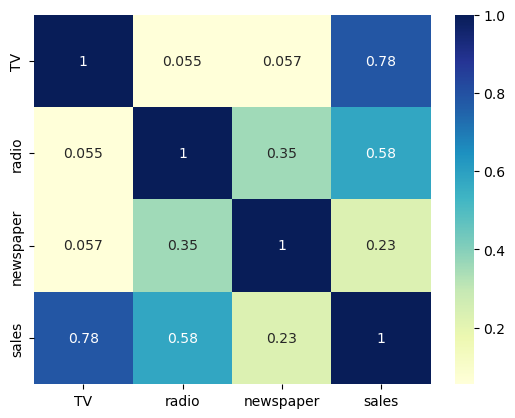

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [10]:
#as we see the TV advertisement has more weight than newspaper,if we do linear regression we can confirm our findings

In [11]:
X = df.drop('sales',axis=1)
y = df['sales']#df.iloc[:,:1].values#

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [15]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
df['sales'].mean()

14.022500000000003

In [19]:
mean_absolute_error(y_test,y_pred)

1.4607567168117601

In [20]:
np.sqrt(mean_squared_error(y_test,y_pred))#rmse

1.7815996615334497

In [21]:
#to validate our choice of linear regression as the algorithm we can check with residual plots
#if residual model has a clear pattern its is suspicious data for linear regression

In [22]:
y_residuals =y_test-y_pred

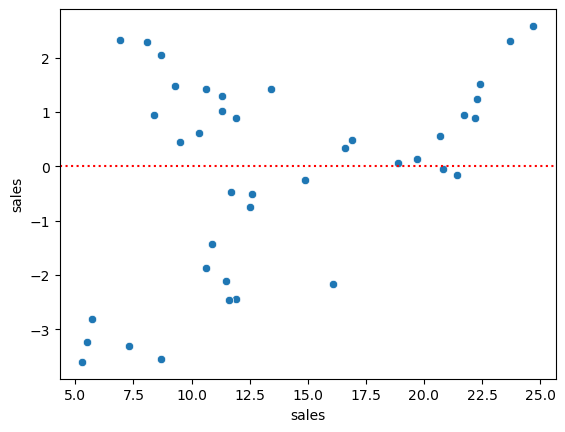

In [23]:
sns.scatterplot(x=y_test,y=y_residuals)
plt.axhline(y=0,color='r',ls='dotted')

In [24]:
#residual plot shows no clear pattern
#now we can check the distribution of the residuals to see if it is centered towards 0

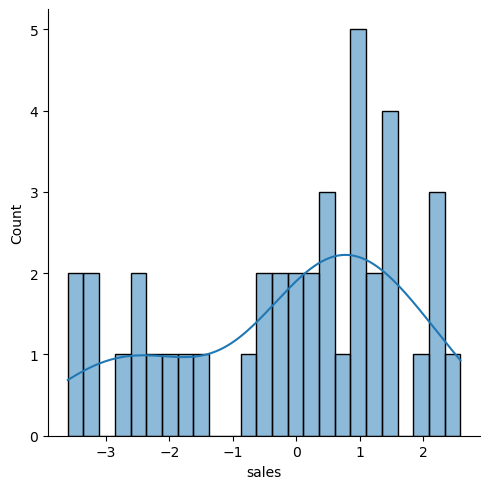

In [25]:
sns.displot(y_residuals,bins=25,kde=True)

In [26]:
#it is more or less centered towards 0 but it does undershoot a bit in general

In [27]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [28]:
#even though TV was more correlated to the sales it has less weightage than radio
#this can be due the fact that radio also influences the newspaper expenditure
#this shows the limitation of the correlation as it only compares the similarities of the trend
#but the weight is the indication of the causing, more the weight is more the feature causes the target

In [29]:
#there is also one one assumption flaw that the features are independently related to sales
#but there can be case when someone decides to buy the product only after hearing about it in multiple medms
#to combat this we use polynomial regression

In [30]:
#POLYNOMIAL REGRESSION

In [31]:
#the linear regression doesnt take in consideration non-linear relations like log(x)
#so sometimes it makes sense to solve for weights for polynomial of an orginal feature rather than the feature itself
#Interaction between features,as we mentioned above combination of the features can help the model become more accurate

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
#as we will run linear regression on it afterwards no need for bias in poly features

In [34]:
poly_features=polynomial_converter.fit_transform(X)

In [35]:
poly_features.shape

(200, 9)

In [36]:
X.shape

(200, 3)

In [37]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [38]:
poly_features[0]#as we see the features are,TV,radio,news,T^2,t*r,t*n,r^2,n*r,n^2

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [39]:
#as we can see with degree=2,it include original features,thier squares and their interaction with each other
#interaction is feature1*feature2

In [40]:
#new train test split
X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.2,random_state=42)

In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
mean_absolute_error(y_test,y_pred)

0.5261794444043753

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.6425809120553587

In [45]:
#the error has marginally reduced

In [46]:
model.coef_

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

In [47]:
#from the weights we derive that even tho tv has a lot of weight 
#its combination with newspaper is very negative
#that is why in original linear relation the tv was having less weight

In [48]:
#to understand the degree that is best fit for the data we need to know the bias variance tradeoff
#this is important to eradicate the issues of underfitting and overfitting

In [49]:
#high bias leads to underfitting and high variance leads to overfitting

In [50]:
#we can choose the polynomial degree for the regression model by looping different degrees and 
#checking for overfitting

In [51]:
train_rmse_errors=[]
test_rmse_errors=[]
for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train);
    test_pred = model.predict(X_test);
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test,test_pred)))
    train_rmse_errors.append(np.sqrt(mean_squared_error(y_train,train_pred)))

In [52]:
train_rmse_errors

[1.6447277656443373,
 0.6003304710491731,
 0.4648237988479814,
 0.36841268311155545,
 0.2504949311489386,
 0.20552866285630678,
 6.050503688317994,
 0.2837791241891473,
 0.6936550999821431]

In [53]:
test_rmse_errors

[1.78159966153345,
 0.6425809120553587,
 0.5427415675109242,
 0.7860986333047504,
 8.74657265720592,
 28.31498300085143,
 2508.410963489653,
 7314.689781152198,
 87159.63916604439]

In [54]:
#when we plot the graphs for the errors we can see the issue of overfitting
#and the best model that did not overfit

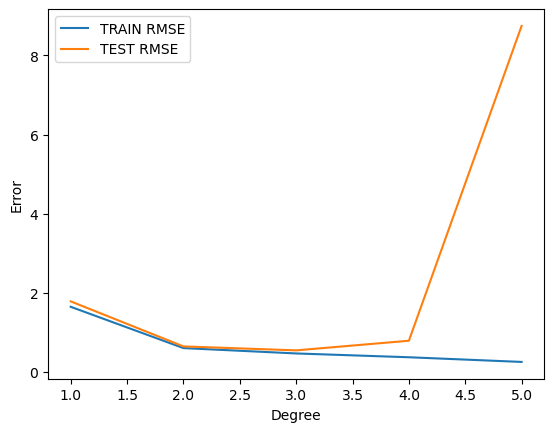

In [55]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()

In [56]:
#as we can see that the test error starts exploding after 4 and is still generally higher than the 
#test data at 4 so the ideal model should be around 2.5 to 3.2 or so so either 2 or 3 is good degree.
#we cant use float point variable as degree

In [57]:
#REGULARIZATION
#we use this to add additional bias term to reduce model complexity and prevent overfitting
#3 TYPES:
#L1->LASSO adds a penalty equivalent to the absolute value of coefficients
#L2->RIDGE adds a penalty equivalent to the squared value of coefficients
#ELASTICNET->combination of L1 and L2,
#     -adds a combination of absolute and squared coefficient penalty depending on the hyperparameters

In [58]:
#FEATURE SCALING
# Two types:Normalization and Standardisation

In [59]:
#CROSS VALIDATION
#K FOLD TECHNIQUE: 
#we divide the dataset in k parts and test the data on 1/k part after training on rest of the 
#we iterate the 1/k so that after k iterations we have effectively trained and evaluated on the whole set

In [60]:
#SCALING THE DATA FOR REGULARISATION TECHNIQUES
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_feature = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [62]:
#RIDGE REGRESSION

In [63]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)
test_predictions = ridge_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [64]:
MAE

0.6296591346758597

In [65]:
RMSE

0.8916327541710891

In [66]:
#checking how it did in training set
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.5230070613645759

In [67]:
#The above results are for alpha = 10, but now we will tune it using cross validation

In [68]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_

0.1

In [69]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [70]:
MAE

0.4667124113194288

In [71]:
RMSE

0.5945136671853409

In [72]:
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.3240172629017452

In [73]:
#LASSO REGRESSION

In [74]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)
lasso_cv_model.alpha_

0.4924531806474871

In [75]:
test_predictions = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [76]:
MAE

0.6811456342837983

In [77]:
RMSE

1.034912736547873

In [78]:
ridge_cv_model.coef_

array([ 5.90523815,  0.46316396,  0.68028713, -6.17743395,  3.73671928,
       -1.40708382,  0.00624704,  0.11128917, -0.2617823 ,  2.17135744,
       -0.51480159,  0.70587211,  0.60311504, -0.53271216,  0.5716495 ,
       -0.34685826,  0.36744388, -0.03938079, -0.12192939])

In [79]:
lasso_cv_model.coef_

array([0.97675148, 0.        , 0.        , 0.        , 3.8148913 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [81]:
#as we can see even though lasso is performing a bit worse than the ridge but it only considered two features
#it is useful as it can help us determine only the most useful features and use them

In [82]:
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.6860946674187012

In [83]:
#ELASTIC NET

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)